In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
#import os
%matplotlib inline
#warnings.filterwarnings('ignore')

In [2]:
!pip install finance-datareader

In [3]:
import FinanceDataReader as fdr
A = fdr.DataReader('084680', '2018-01-01', '2019-11-30')

#Prophet

In [4]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
A['y'] = A['Close']
A['ds'] = A.index

In [5]:
#prophet 객체 선언 및 학습
m = Prophet(changepoint_prior_scale=0.8, #보통 changepoint_prior_scale= 0.05로 되어있음 
            yearly_seasonality=True,
            daily_seasonality=True
            )
m.fit(A)
future = m.make_future_dataframe(periods=30) #30일 예측
forecast = m.predict(future)#predict로 예측을 진행합니다. predict 안에는 이전 단계에서 만들어준 future 데이터프레임을 입력합니다.
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-30:-1] #예측 30일을 출력 합니다

,ds,yhat,yhat_lower,yhat_upper
470,2019-11-30,6521.189407,6332.907598,6687.174458
471,2019-12-01,6602.616265,6424.639695,6792.566659
472,2019-12-02,6592.514046,6419.827654,6785.576347
473,2019-12-03,6679.987687,6499.448720,6864.882423
474,2019-12-04,6773.282009,6587.477595,6953.591222
475,2019-12-05,6851.976101,6662.415941,7052.839898
476,2019-12-06,6928.621117,6734.134842,7110.011118
477,2019-12-07,7108.670387,6928.032376,7309.882480
478,2019-12-08,7192.053464,6996.511585,7377.809595
479,2019-12-09,7180.948923,6994.675219,7372.734125


시각화

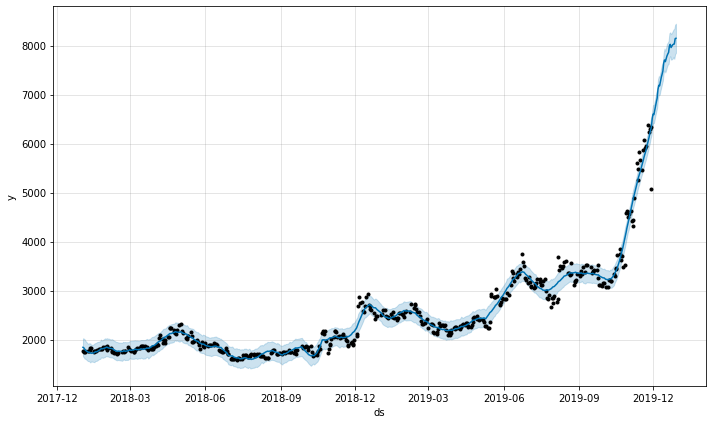

In [6]:
#plot은 트렌드와 함께 예측된 결과물을 시각화하여 보여줍니다.
fig = m.plot(forecast)

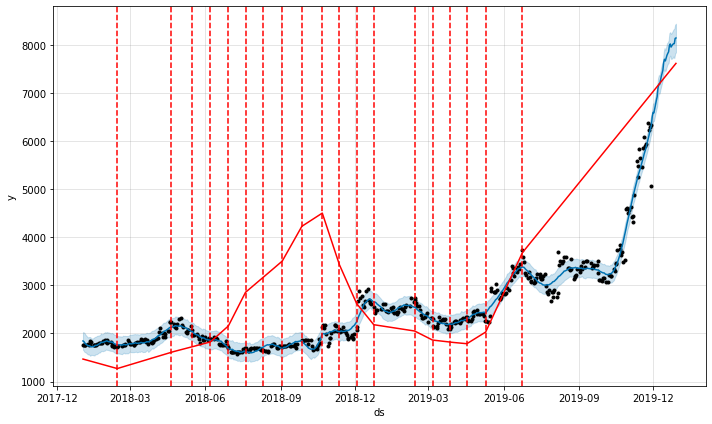

In [7]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [8]:
Close = A['Close']
yhat = forecast[['yhat']].iloc[0:470]
# RMSE
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(Close, yhat) 
np.sqrt(MSE)

144.44729558168078

In [9]:
#plotly 활용
#fig = plot_plotly(m, forecast)

#fig

In [10]:
#컴포넌트 별 시각화
#컴포넌트 별 시각화에서는 seasonality 별 시각화를 진행해 볼 수 있습니다.
#trend, yearly, weekly 데이터를 시각화하여 보여 줍니다.

#plot_components_plotly(m, forecast)

In [11]:
B = fdr.DataReader('084680', '2019-12-01', '2019-12-31') # test
B

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-12-02,5410,5610,5100,5390,9053816,0.061024
2019-12-03,5360,5550,5300,5380,2865306,-0.001855
2019-12-04,5330,5490,4915,5120,3490751,-0.048327
2019-12-05,5040,5120,4735,4805,2935268,-0.061523
2019-12-06,4780,5030,4780,4985,1619419,0.037461
2019-12-09,4985,5380,4985,5090,3503702,0.021063
2019-12-10,5090,5240,4930,4985,1433637,-0.020629
2019-12-11,4990,5090,4950,5060,838752,0.015045
2019-12-12,5170,5230,5050,5120,1236981,0.011858


In [12]:
B.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2019-12-02 to 2019-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     int64  
 1   High    20 non-null     int64  
 2   Low     20 non-null     int64  
 3   Close   20 non-null     int64  
 4   Volume  20 non-null     int64  
 5   Change  20 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 1.1 KB


In [13]:
B['ds'] = B.index

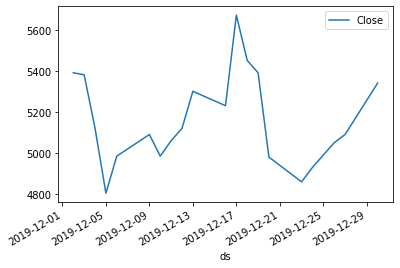

In [14]:
B.plot(x='ds', y='Close')

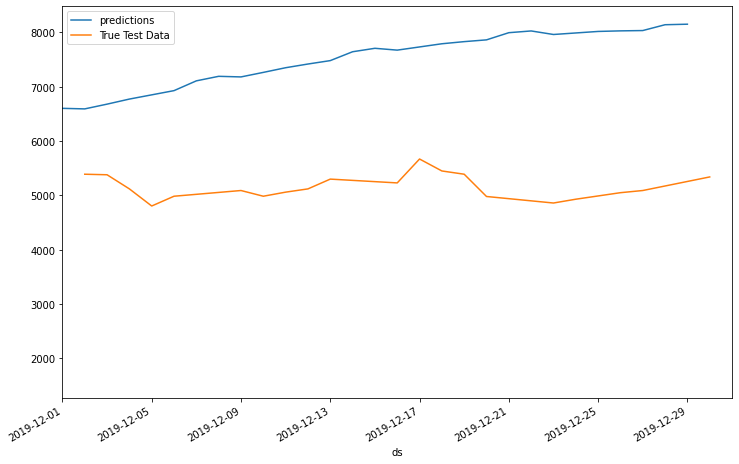

In [15]:
#m.plot(forecast)
ax = forecast[['yhat']].iloc[-1:-30]
ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
B.plot(x='ds', y='Close', legend=True, label='True Test Data',ax=ax,xlim=('2019-12-01', '2019-12-31'))